## Representing n-Venn diagrams with Polyominos
(based on "Minimum Area Venn Diagrams Whose Curves Are Polyominoes", S. Chow and F. Ruskey, *Mathematics Magazine*)

### Definition:
A $n$-Venn diagram is the figure obtained by drawing all possible $2^n$ intersections of $n$ closed curves $(C_i)_{i=1\dots n}$ (e.g., in the following figure $n = 3$)
![vennintro](images/datascience.png)
<center>("How to become a data scientist before you graduate", A. Schneider, Berkeley Science review)</center>

### Problem 1:
How to draw *nice* Venn diagrams for any $n \in \mathbb N^{\ast}$ in the plance?
  * symmetric (invariant to rotations)
  * simple (no more than two curves intersect at any point)
  * ... 
![vennintro2](images/venn5.png)

**Venn (not nice at all):** iterative construction of interlacing curves

**Edwards (partially symmetric):** 

**GKS (symmetric but non simple):** symmetric for $n$ prime

** Limitations: ** Symmetric, simple, convex... construction for $n = 11$ (Newroz, 2012)
![newroz](images/newroz.png)
<center>("A New Rose : The First Simple Symmetric 11-Venn Diagram", Mamakani and Ruskey, 2012)</center>


### Problem 2 (ours):
What Venn diagrams can we draw for a fixed shape of the curves $C_i$ ?

e.g., **circles** ?

Build the Venn diagram: vertices are the circles intersection, edges iff circles intersect.

V $\leq 2 \binom{n}{2}$, no more than 2 intersections for any pair of circles

E 

F $ \leq 2^n$, number of intersections

leads to F + V - E = 2 (in the graph whose vertices are the curves intersections)


**ellipses** ? at least up to $n = 5$

**triangles** ? at least up to $n = 6$ 

## Polyominoes

### Definition
A $n$-polyomino is a contiguous ensemble of equal size squares. It is a generalization of dominoes ($n = 2$). Two polyominos are said to be *congruent* if they have the same shape and size (up to a rotation). 

A polyVenn is a Venn diagram whose curves are defined polyominos.

<center>Polyominos</center> | <center>PolyVenn, $n=5$</center>
----       |---
![polyo](images/polyominos.jpg) | ![polyvenn](images/polyvenn.png)

### Minimality
Each intersection has to be represented in the PolyVenn, i.e. needs at least a $1 \times 1$ square, hence the minimal reachable area for a $n$-PolyVenn is $2^n - 1$. 

**Goal** Can we find an algorithm to build a minimal area $n$-polyVenn for any given $n$ ?

In [11]:
import numpy as np    

class PolyVenn(object):
    def __init__(self, n):
        """ Initialize a n-polyVenn
        
        Args:
         * ``n`` (*int*): number of curves in the Venn diagram
         """
        self.n = n
        self.tiles = np.zeros((1, 1))
        self.pows = np.array([10**i for i in range(n)])
        
    def allocate(self, w, h):
        """ Pre-allocate the internal array
        
        Args:
         * ``w`` (*int*): width
         * ``h`` (*int*): height
        """
        self.tiles = np.zeros((w, h), dtype=np.int)
        
    def add_tile(self, x, y, w=1, h=1, sets=[]):
        """ Add a rectangular tile in the current PolyVenn representation
        
        Args:
         * ``x`` (*int*): lower left corner x position
         * ``y`` (*int*): lower left corner y position
         * ``w`` (*int*): tile width
         * ``h`` (*int*): tile height
        """
        # no overwrite
        assert(not np.sum(self.tiles[x:x+w, y:y+h]))
        # on-the-fly Allocate
        if x + w > self.tiles.shape[0]:
            self.tiles = np.array([list(row) + [0] * (x + w - self.tiles.shape[0]) for row in self.tiles])
        if y + h > self.tiles.shape[1]:
            self.tiles = np.array(list(self.tiles) + [[0] * self.tiles.shape[0] 
                                                      for _ in range(y + h - self.tiles.shape[1])])
        # set tile
        self.tiles[x:x+w, y:y+h] = np.sum(self.pows[sets])
        
    def plot(self, ax):
        cardinals = [[sum(int(x) for x in str(c)) for c in line] for line in self.tiles]
        cardinals = np.array(cardinals)
        print(cardinals.shape)
        ax.set_axis_off()
        ax.imshow(cardinals, interpolation='nearest')
        
    def __repr__(self):
        return self.tiles.__repr__()
    
    def __str__(self):
        return self.tiles.__str__()

## Approximate (naive) solution
Define $C_1 \cap \dots \cap C_n$ as the center polymino of size $2^{n-1} -2 \times 1$, then set the remaining $2^n - 2$  intersections as  contiguous $1x1$ squares.

The total diagram has area $3 \times 2^{n-1} - 4 \sim \frac{3}{2} (2^n - 1)$

![truc](Algo1.png)


()
(0,)
(1,)
(2,)
(3,)
(0, 1)
(0, 2)
(0, 3)
(1, 2)
(1, 3)
(2, 3)
(0, 1, 2)
(0, 1, 3)
(0, 2, 3)
(1, 2, 3)
(8, 3)


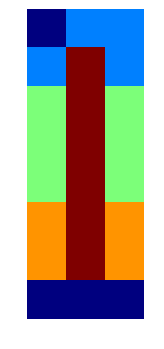

[[   0    1   10]
 [ 100 1111 1000]
 [  11 1111  101]
 [1001 1111  110]
 [1010 1111 1100]
 [ 111 1111 1011]
 [1101 1111 1110]
 [   0    0    0]]


In [13]:
from itertools import combinations

def min_polyVenn_app(n):
    p = PolyVenn(n)
    p.allocate(2**(n-1), 3)
    p.add_tile(1, 1, w=(2**(n-1) - 2), sets=np.arange(n))
    x, y = np.where(p.tiles == 0)
    i = 0
    for r in range(n):
        for pe in combinations(range(n), r):
            print(pe)
            p.add_tile(x[i], y[i], sets=list(pe))
            i += 1
    return p
    print(p)
    
    
from matplotlib import pyplot as plt
p = min_polyVenn_app(4)
_, ax = plt.subplots(1, 1)
p.plot(ax)
plt.show()
print(p)

## Asymptotically optimal algorithm

Similar idea, but we will rattach *chains* to the central block rather than $1 \times 1$ blocks

** Notations **

$\mathcal S_n$ denotes the set of all intersections of the curves $C_i$ for some $n$, i.e. $\mathcal S_3 = \{A, B, C, AB, AC, BC, ABC, 0\}$. 

We want to decompose/partition $\mathcal S_n$ in symmetric chains growing for inclusions. 

$R(k)$ is the set of all $s \in S$ such that $|s| = k$ not included in one the growing chain yet.

** Growing chain **

$x < y$ iff $m(x, y) < m(y, x)$

where $m(x, y) = - \infty$ if $x \subset y$ else $\mbox{min}\  x \backslash y$  

**Algorithm**
  * j = $\mbox{min}_k \{R(k)\ |\ R(k) \neq \varnothing\}$
  * Start a new chain with $x_1 = \mbox{min}\ R(j)$
  * Increase it with $x_i = \mbox{min}\ \{x \in R([x_i| + 1)\ |\ x_i \subset x\}$
  
Iterate until obtaining a partition of $\mathcal S_n$

Attach the chains to the central tile of size $L \times 1$

![g](venn52.png)

** Proof elements**

  * **Termination.** $\sum_k |R(k)|$ is strictly decreasing and lower-bounded
  
  * **Number of chains.** Let $pj$ the number of chains such that $|x_1| = j$ and consequently the last element has size $n - j$ because of symmetry.
  
  $p_k = \binom{n}{k} \binom{n}{k - 1}$
  
  Hence the number of chains created is $C(n) = \binom{n}{n / 2}$
  
  * **Polymino area.** $2 + 2L = C(n)$ (number of "atach points")
  
  $A(n) = 2^n - 1 + \alpha \binom{n}{n / 2}$
  
  $A(n) = (2^n - 1)(1 + O \left( \frac{1}{\sqrt{n}} \right) )$